In [28]:
#1读取数据
import pandas as pd 
dataset=pd.read_csv('SupplyChain.csv',encoding='unicode_escape')
dataset

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/15/2018 11:24,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 3:40,Standard Class
180515,DEBIT,3,2,-613.770019,395.980011,Late delivery,1,45,Fishing,Bakersfield,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/19/2016 1:34,Second Class
180516,TRANSFER,5,4,141.110001,391.980011,Late delivery,1,45,Fishing,Bristol,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 21:00,Standard Class
180517,PAYMENT,3,4,186.229996,387.980011,Advance shipping,0,45,Fishing,Caguas,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/18/2016 20:18,Standard Class


In [29]:
#看看是否有缺失值
temp=dataset.isnull().sum()
temp
#可以看到缺失值很多，这个时候把缺失值大于0的部分给拿出来

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


In [30]:
temp[temp>0]#这样就把有确实值的全部给提取出来了

Customer Lname              8
Customer Zipcode            3
Order Zipcode          155679
Product Description    180519
dtype: int64

In [31]:
#将firstName和LastName合并
dataset['Customer Full Name']=dataset['Customer Lname']+dataset['Customer Fname']
dataset[ ['Customer Full Name','Customer Lname','Customer Fname'] ]

,Customer Full Name,Customer Lname,Customer Fname
0,HollowayCally,Holloway,Cally
1,LunaIrene,Luna,Irene
2,MaldonadoGillian,Maldonado,Gillian
3,TateTana,Tate,Tana
4,HendricksOrli,Hendricks,Orli
...,...,...,...
180514,PetersonMaria,Peterson,Maria
180515,ClarkRonald,Clark,Ronald
180516,SmithJohn,Smith,John
180517,SmithMary,Smith,Mary


In [32]:
#探索一下ZipCode
dataset['Customer Zipcode'].value_counts()

725.0      66770
921.0        337
23455.0      334
957.0        297
79109.0      292
           ...  
60636.0       18
89015.0       16
32210.0       15
7728.0        13
11225.0        9
Name: Customer Zipcode, Length: 995, dtype: int64

In [33]:
#看一下里面有多少个确实值
dataset['Customer Zipcode'].isnull().sum()       #可以看到有3个缺失值

3

In [34]:
#用0进行填充一下
dataset['Customer Zipcode']=dataset['Customer Zipcode'].fillna(0)
dataset['Customer Zipcode'].isnull().sum()#填充完之后就没有缺失值

0

In [35]:
#导包 准备可视化一下数据的热力图
import matplotlib.pyplot as plt
import seaborn as sns
#换个名字，用data来表示吧,节省一下字母
data=dataset
data.corr #这个相关系数的表太长了，画图看一看

<bound method DataFrame.corr of             Type  Days for shipping (real)  Days for shipment (scheduled)  \
0          DEBIT                         3                              4   
1       TRANSFER                         5                              4   
2           CASH                         4                              4   
3          DEBIT                         3                              4   
4        PAYMENT                         2                              4   
...          ...                       ...                            ...   
180514      CASH                         4                              4   
180515     DEBIT                         3                              2   
180516  TRANSFER                         5                              4   
180517   PAYMENT                         3                              4   
180518   PAYMENT                         4                              4   

        Benefit per order  Sales per custom

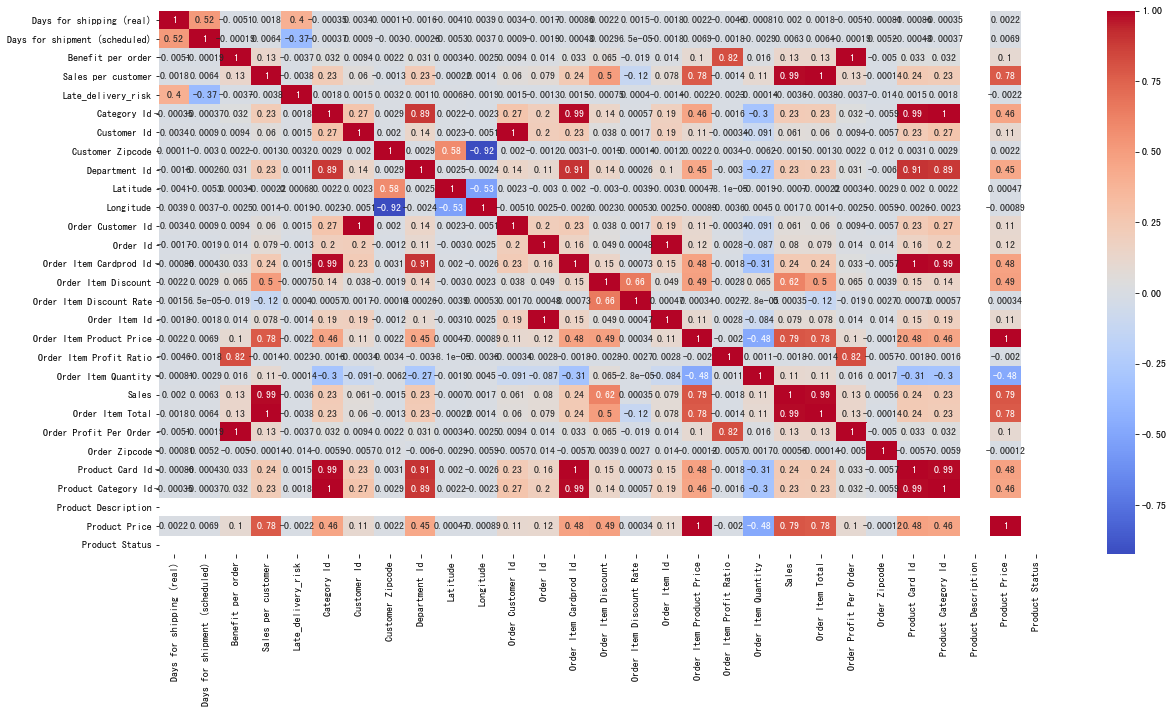

In [36]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')#通过观察表发，除了自己跟自己相关性较强以外，其他有些数据之间的相关性还是挺强的

In [37]:
#按照不同的Market, Order Region进行数据探索
data['Market'].value_counts()

LATAM           51594
Europe          50252
Pacific Asia    41260
USCA            25799
Africa          11614
Name: Market, dtype: int64

In [40]:
#对销售额进行探索Sales per customer
market=data.groupby('Market')
market['Sales per customer'].sum()

Market
Africa          2.061679e+06
Europe          9.769198e+06
LATAM           9.235762e+06
Pacific Asia    7.434263e+06
USCA            4.553500e+06
Name: Sales per customer, dtype: float64

In [42]:
#排个序
market['Sales per customer'].sum().sort_values(ascending=False)

Market
Europe          9.769198e+06
LATAM           9.235762e+06
Pacific Asia    7.434263e+06
USCA            4.553500e+06
Africa          2.061679e+06
Name: Sales per customer, dtype: float64

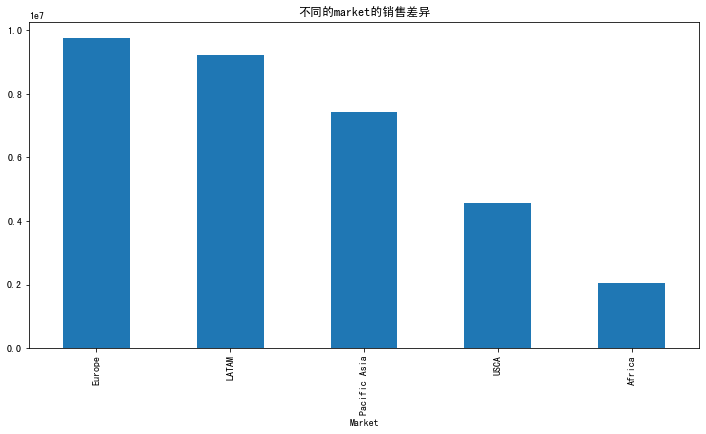

In [43]:
#可视化呈现
market['Sales per customer'].sum().sort_values(ascending=False).plot.bar(figsize=(12,6),title="不同的market的销售差异")
#可以看到第一名是欧洲，依次到最后非洲

In [44]:
#对Order Region进行数据探索
data['Order Region'].value_counts()

Central America    28341
Western Europe     27109
South America      14935
Oceania            10148
Northern Europe     9792
Southeast Asia      9539
Southern Europe     9431
Caribbean           8318
West of USA         7993
South Asia          7731
Eastern Asia        7280
East of USA         6915
West Asia           6009
US Center           5887
South of  USA       4045
Eastern Europe      3920
West Africa         3696
North Africa        3232
East Africa         1852
Central Africa      1677
Southern Africa     1157
Canada               959
Central Asia         553
Name: Order Region, dtype: int64

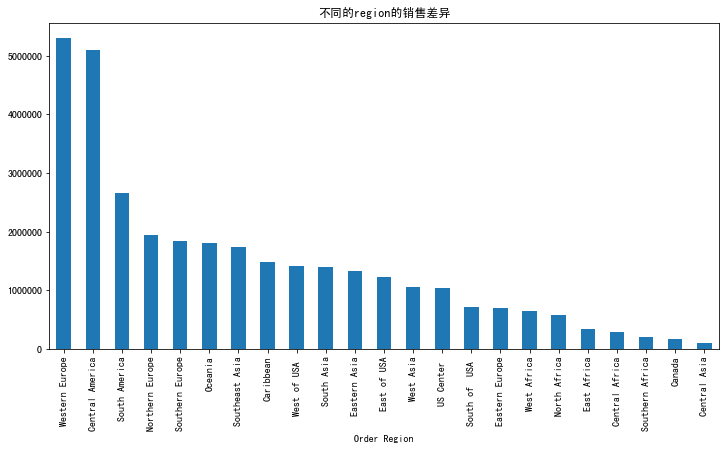

In [45]:
#可视化呈现
region=data.groupby('Order Region')
region['Sales per customer'].sum().sort_values(ascending=False).plot.bar(figsize=(12,6),title="不同的region的销售差异")

In [47]:
#对Category Name进行数据探索
print(data['Category Name'].value_counts())

Cleats                  24551
Men's Footwear          22246
Women's Apparel         21035
Indoor/Outdoor Games    19298
Fishing                 17325
Water Sports            15540
Camping & Hiking        13729
Cardio Equipment        12487
Shop By Sport           10984
Electronics              3156
Accessories              1780
Golf Balls               1475
Girls' Apparel           1201
Golf Gloves              1070
Trade-In                  974
Video Games               838
Children's Clothing       652
Women's Clothing          650
Baseball & Softball       632
Hockey                    614
Cameras                   592
Toys                      529
Golf Shoes                524
Pet Supplies              492
Crafts                    484
Garden                    484
DVDs                      483
Computers                 442
Golf Apparel              441
Hunting & Shooting        440
Music                     434
Consumer Electronics      431
Boxing & MMA              423
Books     

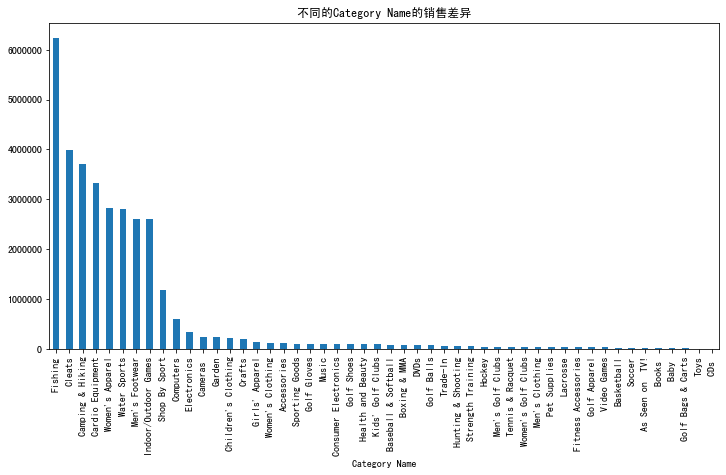

In [50]:
#可视化呈现
CategoryName=data.groupby('Category Name')
CategoryName['Sales per customer'].sum().sort_values(ascending=False).plot.bar(figsize=(12,6),title="不同的Category Name的销售差异")

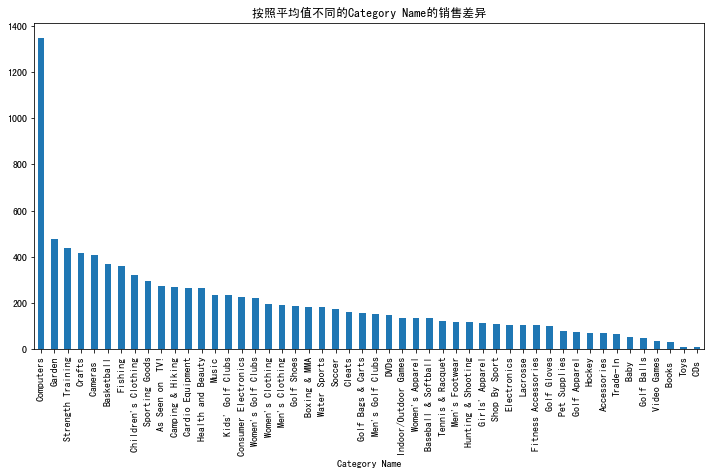

In [51]:
CategoryName['Sales per customer'].mean().sort_values(ascending=False).plot.bar(figsize=(12,6),title="按照平均值不同的Category Name的销售差异")

In [53]:
#按照不同的时间维度（年，月，星期，小时）的趋势Product Price与Sales per customer 相关性如何
data['order date (DateOrders)'].describe()

count             180519
unique             65752
top       1/6/2016 21:33
freq                   5
Name: order date (DateOrders), dtype: object

In [54]:
#创建成时间戳
temp=pd.DatetimeIndex(data['order date (DateOrders)'])

In [55]:
temp

DatetimeIndex(['2018-01-31 22:56:00', '2018-01-13 12:27:00',
               '2018-01-13 12:06:00', '2018-01-13 11:45:00',
               '2018-01-13 11:24:00', '2018-01-13 11:03:00',
               '2018-01-13 10:42:00', '2018-01-13 10:21:00',
               '2018-01-13 10:00:00', '2018-01-13 09:39:00',
               ...
               '2016-01-16 06:49:00', '2016-01-16 06:49:00',
               '2016-01-16 06:28:00', '2016-01-16 06:07:00',
               '2016-01-16 05:04:00', '2016-01-16 03:40:00',
               '2016-01-16 01:34:00', '2016-01-15 21:00:00',
               '2016-01-15 20:18:00', '2016-01-15 18:54:00'],
              dtype='datetime64[ns]', name='order date (DateOrders)', length=180519, freq=None)

In [56]:
# 获取不同尺度的时间,year month week hour month_year
data['order_year'] = temp.year
data['order_month'] = temp.month
data['order_week_day'] = temp.weekday
data['order_hour'] = temp.hour
data['order_month_year'] = temp.to_period('M')
data[['order_year','order_month','order_week_day','order_hour','order_month_year']]

,order_year,order_month,order_week_day,order_hour,order_month_year
0,2018,1,2,22,2018-01
1,2018,1,5,12,2018-01
2,2018,1,5,12,2018-01
3,2018,1,5,11,2018-01
4,2018,1,5,11,2018-01
...,...,...,...,...,...
180514,2016,1,5,3,2016-01
180515,2016,1,5,1,2016-01
180516,2016,1,4,21,2016-01
180517,2016,1,4,20,2016-01


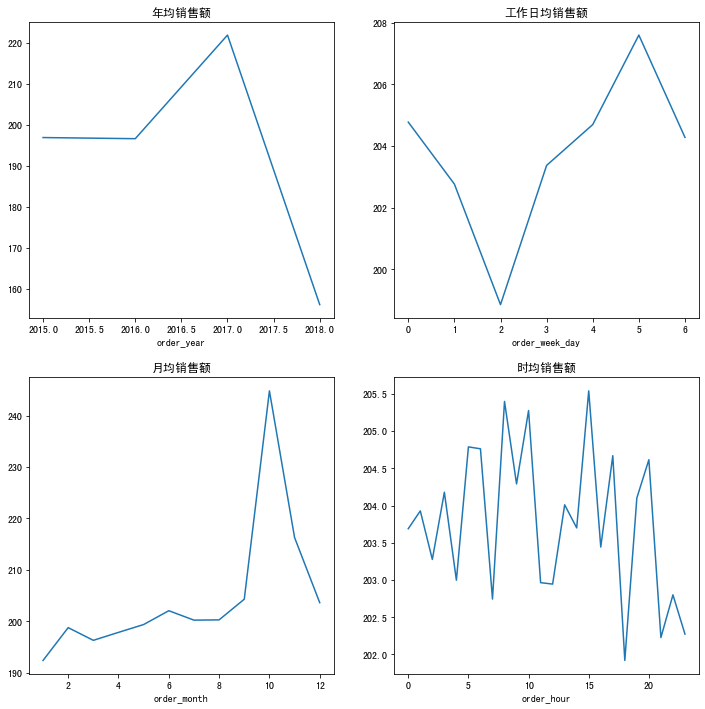

In [60]:
plt.figure()
plt.subplot(2,2,1)
df_year=data.groupby('order_year')
df_year['Sales'].mean().plot(figsize=(12,12),title="年均销售额")

plt.subplot(2,2,2)
df_week_day=data.groupby('order_week_day')
df_week_day['Sales'].mean().plot(figsize=(12,12),title="工作日均销售额")

plt.subplot(2,2,3)
df_month=data.groupby('order_month')
df_month['Sales'].mean().plot(figsize=(12,12),title="月均销售额")

plt.subplot(2,2,4)
df_hour=data.groupby('order_hour')
df_hour['Sales'].mean().plot(figsize=(12,12),title="时均销售额")

Text(0, 0.5, 'Sales per customer')

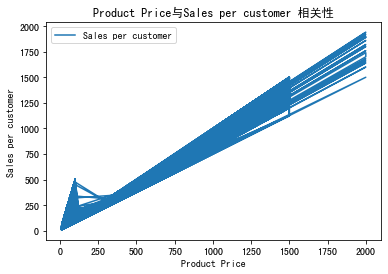

In [62]:
#Product Price与Sales per customer 相关性如何
data.plot(x='Product Price',y='Sales per customer')#可以看出大致成正比
plt.title('Product Price与Sales per customer 相关性')
plt.xlabel('Product Price')
plt.ylabel('Sales per customer')